In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [51]:
image_path = r'Masks\pvdCherry\044_43-13-ROOT1-2023-08-08_pvdCherry_OD001_Col0_02-Fish Eye Corrected.png'
root_mask_path = r'Masks\pvdCherry\044_43-13-ROOT1-2023-08-08_pvdCherry_OD001_Col0_02-Fish Eye Corrected_root_mask.tif'
shoot_mask_path = r'Masks\pvdCherry\044_43-13-ROOT1-2023-08-08_pvdCherry_OD001_Col0_02-Fish Eye Corrected_shoot_mask.tif'
seed_mask_path = r'Masks\pvdCherry\044_43-13-ROOT1-2023-08-08_pvdCherry_OD001_Col0_02-Fish Eye Corrected_seed_mask.tif'
occ_root_mask_path = r'Masks\pvdCherry\044_43-13-ROOT1-2023-08-08_pvdCherry_OD001_Col0_02-Fish Eye Corrected_occluded_root_mask.tif'

In [52]:
im = cv2.imread(image_path, 0)
im.shape

(3006, 4202)

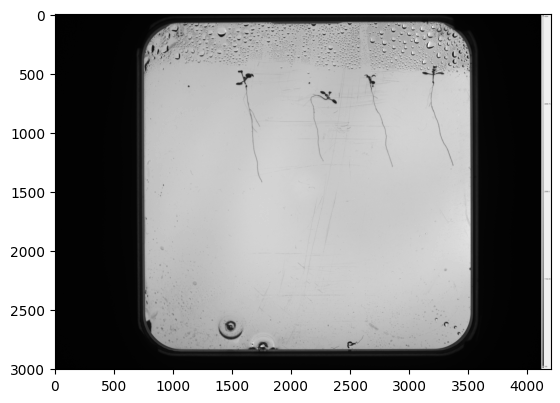

In [53]:
plt.imshow(im, cmap='gray')

### Deliverables

For each image you have labeled, you need to deliver 4 segmentation masks.

- One for the root pixels
- One for the shoot pixels
- One for the seed pixels
- One for the occluded root pixels

In [54]:
root_mask = cv2.imread(root_mask_path, 0)
shoot_mask = cv2.imread(shoot_mask_path, 0)
seed_mask = cv2.imread(seed_mask_path, 0)
occ_root_mask = cv2.imread(occ_root_mask_path, 0)

Text(0.5, 1.0, 'Occluded Root Mask')

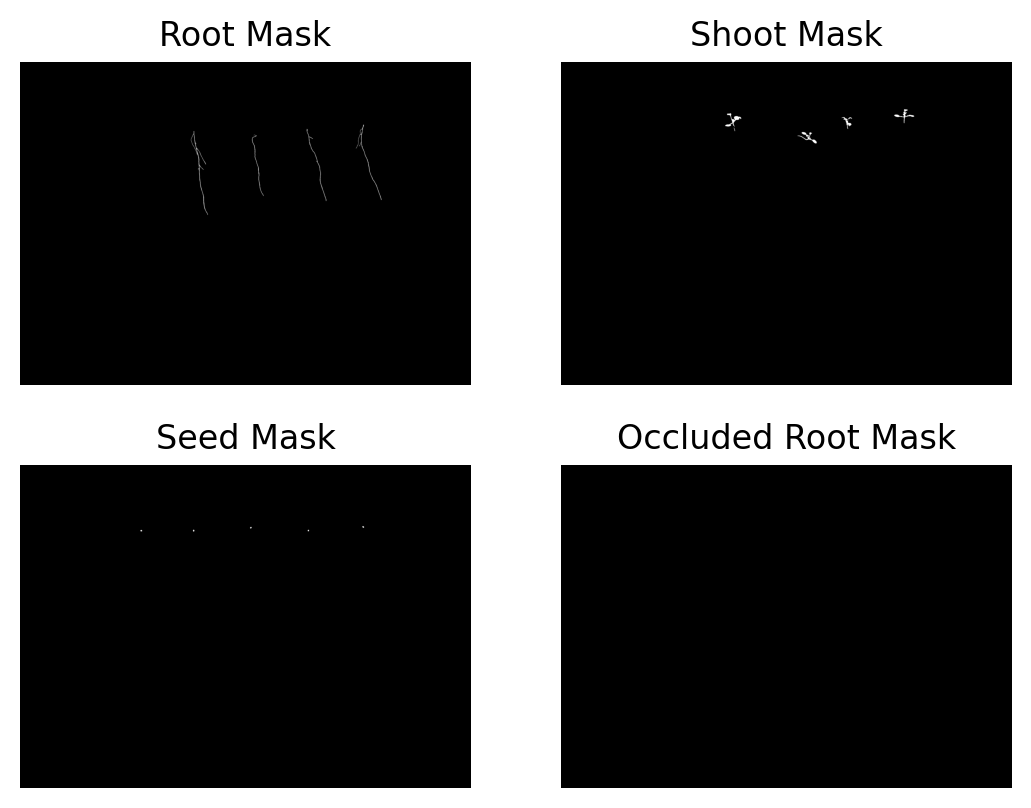

In [55]:
fig, ax = plt.subplots(2, 2, dpi=200)
ax[0, 0].imshow(root_mask, cmap='gray')
ax[0, 0].axis('off')
ax[0, 0].set_title('Root Mask')
ax[0, 1].imshow(shoot_mask, cmap='gray')
ax[0, 1].axis('off')
ax[0, 1].set_title('Shoot Mask')
ax[1, 0].imshow(seed_mask, cmap='gray')
ax[1, 0].axis('off')
ax[1, 0].set_title('Seed Mask')
ax[1, 1].imshow(occ_root_mask, cmap='gray')
ax[1, 1].axis('off')
ax[1, 1].set_title('Occluded Root Mask')

The deliverables need to satisfy the following requirements:

###  Requirement 1

Segmentation masks should be a `.tif` file with the following naming convention:

- `name_of_the_image_root_mask.tif`
- `name_of_the_image_shoot_mask.tif`
- `name_of_the_image_seed_mask.tif`
- `name_of_the_image_occluded_root_mask.tif`

In [56]:
# the assert statements are written assuming the image and the masks are in the same directory.
assert(image_path[:-4] + "_root_mask.tif" == root_mask_path)
assert(image_path[:-4] + "_shoot_mask.tif" == shoot_mask_path)
assert(image_path[:-4] + "_seed_mask.tif" == seed_mask_path)
assert(image_path[:-4] + "_occluded_root_mask.tif" == occ_root_mask_path)

### Requirement 2

Shape of the segmentation masks should be equal to the shape of the raw image assigned to you.

In [57]:
assert(im.shape == root_mask.shape)
assert(im.shape == shoot_mask.shape)
assert(im.shape == seed_mask.shape)
assert(im.shape == occ_root_mask.shape)

### Requirement 3

The masks must be binary images with pixel values 0 and 1.

- If they are not binary images, they won't be accepted.
- If they are binary images, but with pixel values 0 and 255, they won't be accepted.

In [58]:
assert(np.all(np.logical_or(root_mask == 0, root_mask == 1)))
assert(np.all(np.logical_or(shoot_mask == 0, shoot_mask == 1)))
assert(np.all(np.logical_or(seed_mask == 0, seed_mask == 1)))
assert(np.all(np.logical_or(occ_root_mask == 0, occ_root_mask == 1)))

### Requirement 4

Make sure that 0 represents the background and 1 represents the foreground. For example for the root mask 0 must indicate not-root pixels and 1 must indicate root pixels.

In [59]:
assert(np.sum(root_mask == 0) > np.sum(root_mask == 1))
assert(np.sum(shoot_mask == 0) > np.sum(shoot_mask == 1))
assert(np.sum(seed_mask == 0) > np.sum(seed_mask == 1))
assert(np.sum(occ_root_mask == 0) > np.sum(occ_root_mask == 1))

### Requirement 5

Your labels must be "good enough". The quality of your labels will be assessed qualitatively, in comparison to the example labels provided by the domain expert. If your mentors or the client detect any quality issues, you will need to fix them.

- If you have any doubts about labeling instructions, contact your mentor.
- Do not label root hairs as root.
- Make sure all root tips are labeled as accurately as possible
- Make sure that the junction between the main root and the hypocotyl is labeled as accurately as possible
- Make sure that there are no holes in your labels (unless there is an actually hole)
- Some plant organs will have artifacts on them (e.g. bubbles), make sure that you do not label the artifacts as part of the plant organ
- Be careful with the borders.
- If a root is occluded and you can guess its path, label it with occluded_root label.

### Summary

You need to deliver 3 segmentation masks per image which needs to satisfy the following requirements:

- Requirement 1: Follow the naming convention
- Requirement 2: The shape of the image and the masks should match
- Requirement 3: Masks should be binary images with 0 and 1
- Requirement 4: 0 is the background and 1 is the foreground
- Requirement 5: Your labels must have an acceptable quality

### One tip

When processing the masks if you need a mask for the plant or not_plant, you can use bitwise operations. Note that these masks are not deliverables.

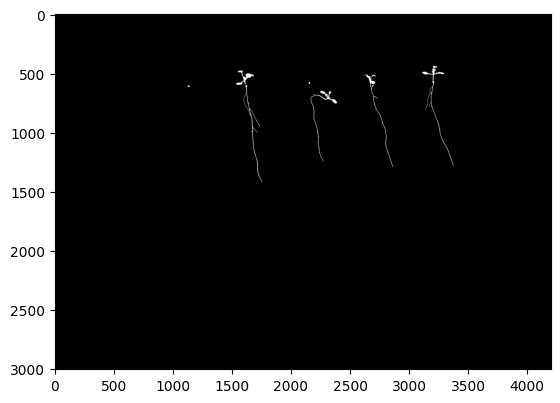

In [60]:
plant_label = cv2.bitwise_or(root_mask, shoot_mask)
plant_label = cv2.bitwise_or(plant_label, seed_mask)
plant_label = cv2.bitwise_or(plant_label, occ_root_mask)
plt.imshow(plant_label, cmap='gray')

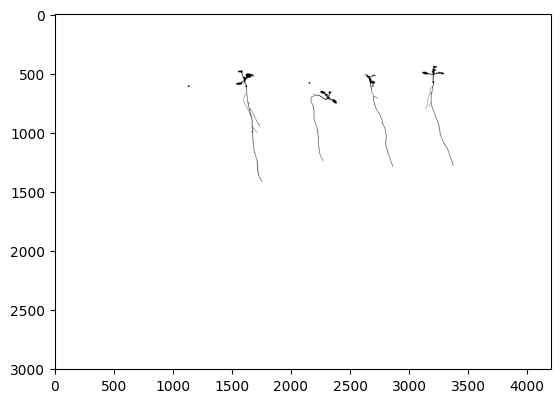

In [61]:
background_label = cv2.bitwise_not(plant_label)
plt.imshow(background_label, cmap='gray')